In [ ]:
#Import libraries
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
import statsmodels.api as sm
sns.set()

import warnings # supress warnings
warnings.filterwarnings('ignore')

We load the dataset for evictions so we can take a look at our variables and values of the Eviction Lab dataset for all Races in Los Angeles Country from 2000 to 2018 

In [80]:
#actual file path for eviction dataset
df=pd.read_csv('group01/eviction.csv')
df

,GEOID,name,parent-location,year,population,poverty-rate,pct-renter-occupied,median-gross-rent,median-household-income,median-property-value,...,households-threatened-rate,households-threatened-rate-lower,households-threatened-rate-upper,eviction-filings,filings-per-day,eviction-filings-lower,eviction-filings-upper,eviction-filing-rate,eviction-filing-rate-lower,eviction-filing-rate-upper
0,6037,Los Angeles County,California,2000,9519338,17.91,49.96,704,42189,209300,...,3.44,2.40,4.81,58548.93,159.97,40126.34,82745.78,3.58,2.46,5.06
1,6037,Los Angeles County,California,2001,9519338,17.91,49.88,704,42189,209300,...,3.83,2.70,5.28,66257.00,181.53,46630.93,92295.67,4.04,2.84,5.63
2,6037,Los Angeles County,California,2002,9519338,17.91,49.81,704,42189,209300,...,3.60,3.60,3.60,61973.00,169.79,61973.00,61973.00,3.76,3.76,3.76
3,6037,Los Angeles County,California,2003,9519338,17.91,49.74,704,42189,209300,...,3.99,2.88,5.49,69140.53,189.43,48706.27,96080.55,4.18,2.95,5.81
4,6037,Los Angeles County,California,2004,9519338,17.91,49.66,704,42189,209300,...,3.32,3.21,3.38,57074.00,155.94,57074.00,57074.00,3.44,3.44,3.44
5,6037,Los Angeles County,California,2005,9785295,12.51,49.59,1076,54828,521900,...,3.14,3.04,3.19,53942.00,147.79,53942.00,53942.00,3.24,3.24,3.24
6,6037,Los Angeles County,California,2006,9785295,12.51,49.52,1076,54828,521900,...,3.06,2.97,3.11,52834.00,144.75,52834.00,52834.00,3.16,3.16,3.16
7,6037,Los Angeles County,California,2007,9785295,12.51,49.45,1076,54828,521900,...,3.58,3.45,3.65,62401.00,170.96,62401.00,62401.00,3.72,3.72,3.72
8,6037,Los Angeles County,California,2008,9785295,12.51,49.38,1076,54828,521900,...,4.23,4.07,4.33,74420.00,203.33,74420.00,74420.00,4.42,4.42,4.42
9,6037,Los Angeles County,California,2009,9785295,12.51,49.31,1076,54828,521900,...,4.01,3.86,4.11,70865.00,194.15,70865.00,70865.00,4.19,4.19,4.19


In [81]:
#list the columns provided in the dataset
df.columns.to_list()

['GEOID',
 'name',
 'parent-location',
 'year',
 'population',
 'poverty-rate',
 'pct-renter-occupied',
 'median-gross-rent',
 'median-household-income',
 'median-property-value',
 'rent-burden',
 'pct-white',
 'pct-af-am',
 'pct-hispanic',
 'pct-am-ind',
 'pct-asian',
 'pct-nh-pi',
 'pct-multiple',
 'pct-other',
 'households-threatened',
 'households-threatened-lower',
 'households-threatened-upper',
 'households-threatened-rate',
 'households-threatened-rate-lower',
 'households-threatened-rate-upper',
 'eviction-filings',
 'filings-per-day',
 'eviction-filings-lower',
 'eviction-filings-upper',
 'eviction-filing-rate',
 'eviction-filing-rate-lower',
 'eviction-filing-rate-upper']

# Exploratory Data Analysis
## Eviction filings distribution by year 
We see a steep decline in eviction filings in Los Angeles from 2003-2006 and the numbers pick up in 2007 and peak in 2008 during the financial crisis. There has been a steady decline in filings from 2012 through 2018.

Text(0, 0.5, 'eviction filings')

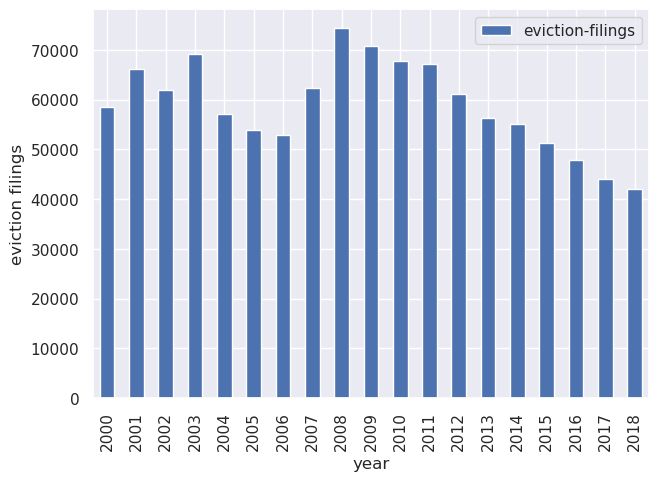

In [135]:
#Eviction filings distribution by year  
df.plot.bar(x='year', y='eviction-filings')
plt.ylabel('eviction filings')

## Distribution of Eviction Filings by Race
The Hispanic race show the most filings across the timeline under review. The second race White is the second in filing rankings followed by Asian and the least is multiple races. 

<Figure size 2000x1000 with 0 Axes>

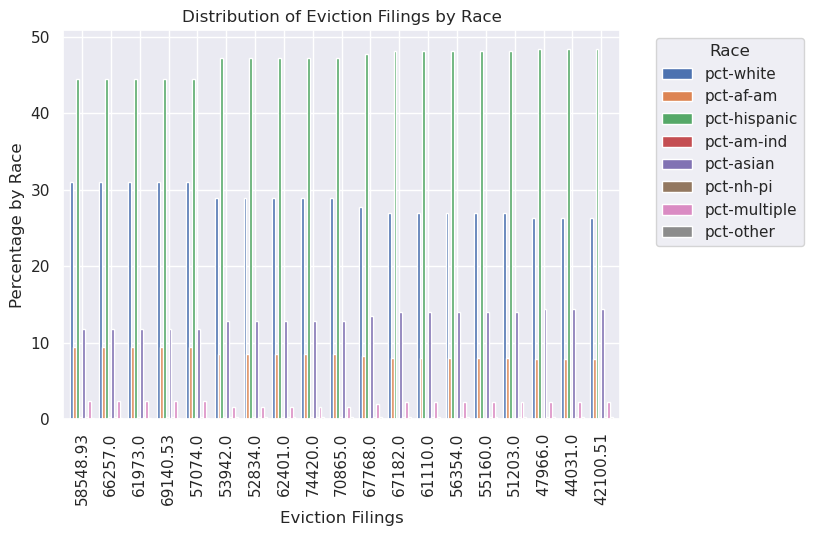

In [104]:
#Distribution of Eviction Filings by Race
# Select relevant columns
race_columns = ['pct-white', 'pct-af-am', 'pct-hispanic', 'pct-am-ind', 'pct-asian', 'pct-nh-pi', 'pct-multiple', 'pct-other']
columns_of_interest = ['eviction-filings'] + race_columns
df_race = df[columns_of_interest]

# Plot the data
plt.figure(figsize=(20, 10))
ax = df_race.plot.bar(x='eviction-filings', y=race_columns, width=0.8)

# Move the legend outside the plot to the right
ax.legend(title='Race', bbox_to_anchor=(1.05, 1), loc='upper left')

#Label the plot
plt.title('Distribution of Eviction Filings by Race')
plt.xlabel('Eviction Filings')
plt.ylabel('Percentage by Race')
plt.show()


<Figure size 1200x800 with 0 Axes>

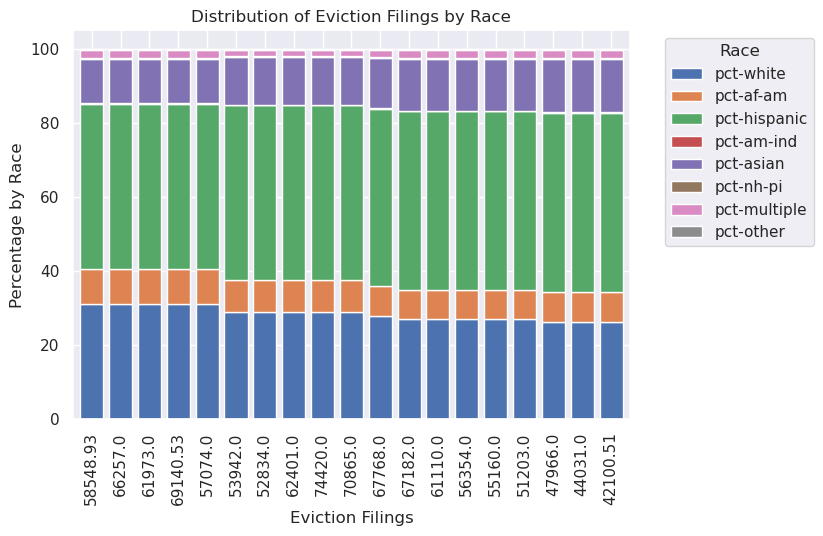

In [102]:
#Distribution of Eviction Filings by Race
# Select relevant columns
race_columns = ['pct-white', 'pct-af-am', 'pct-hispanic', 'pct-am-ind', 'pct-asian', 'pct-nh-pi', 'pct-multiple', 'pct-other']
columns_of_interest = ['eviction-filings'] + race_columns
df_race = df[columns_of_interest]

# Plot the data
plt.figure(figsize=(12, 8))
ax = df_race.plot.bar(x='eviction-filings', y=race_columns, stacked=True, width=0.8)

# Move the legend outside the plot to the right
ax.legend(title='Race', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title('Distribution of Eviction Filings by Race')
plt.xlabel('Eviction Filings')
plt.ylabel('Percentage by Race')
plt.show()

## Distribution of Eviction Filings by Race Over the Years
The analysis show that the Hispanic trend over the years kept going up compared to other races with a flattening curve over the same timeline.

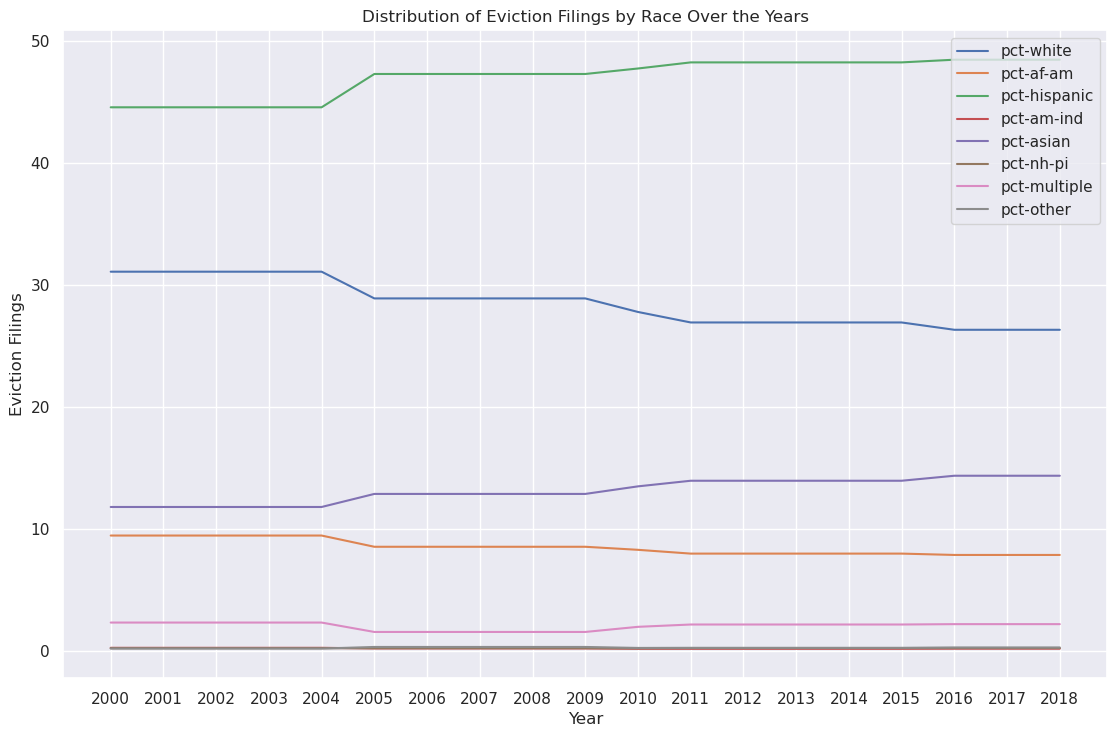

In [133]:
#Distribution of Eviction Filings by Race Over the Years
# Select relevant columns
race_columns = ['pct-white', 'pct-af-am', 'pct-hispanic', 'pct-am-ind', 'pct-asian', 'pct-nh-pi', 'pct-multiple', 'pct-other']
columns_of_interest = ['year', 'eviction-filings'] + race_columns
df_race = df[columns_of_interest]

# Convert 'year' column to integers
df_race['year'] = df_race['year'].astype(int)

# Group by year and sum the eviction filings for each race
df_race_grouped = df_race.groupby('year')[race_columns].sum()

# Plot the data
plt.figure(figsize=(12, 8))
for race in race_columns:
    plt.plot(df_race_grouped.index, df_race_grouped[race], label=race)

plt.title('Distribution of Eviction Filings by Race Over the Years')
plt.xlabel('Year')
plt.ylabel('Eviction Filings')
plt.legend()

# Set integer ticks on the x-axis
plt.xticks(range(2000, 2019))

plt.show()


## Eviction Filing Rate Distribution by Year
Distribution of rates show a sharp decline after the 2008 financial crisis and have maintined the trend through covid times 2019-2022 as shown in our research thats when numbers started picking up again.

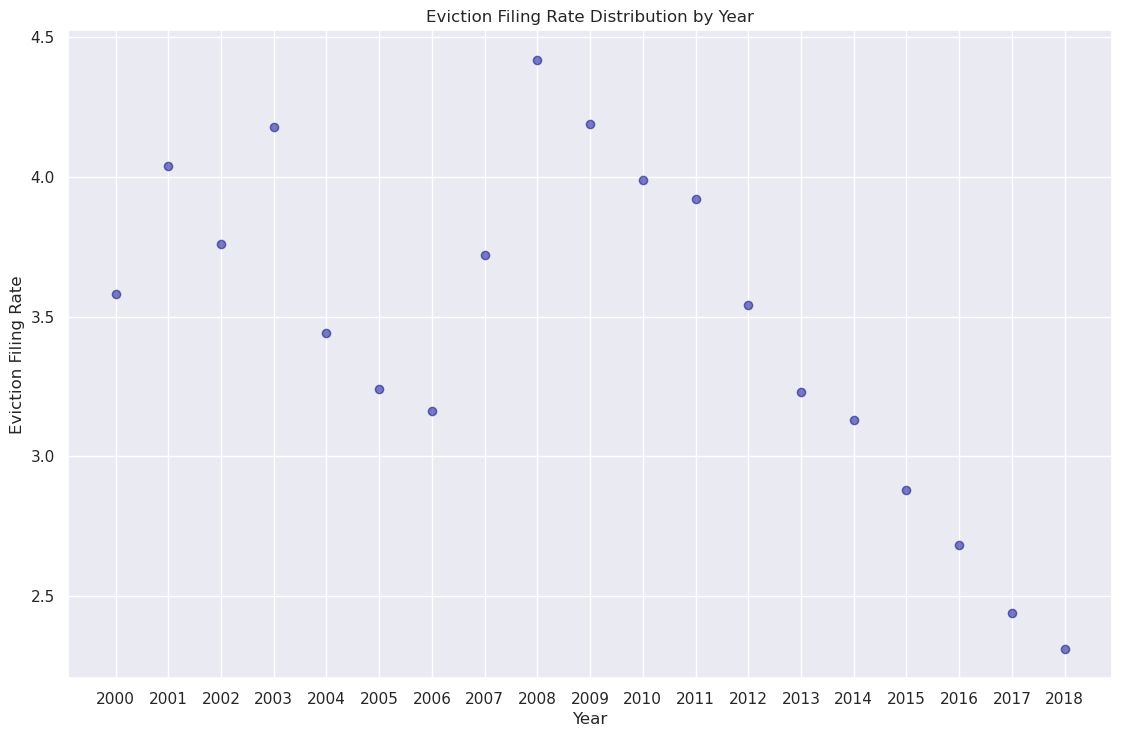

In [131]:
# Eviction filing rate distribution by year 
# Plot the data as a scatter plot
plt.figure(figsize=(12, 8))
plt.scatter(df['year'], df['eviction-filing-rate'], color='darkblue', alpha=0.5)
plt.title('Eviction Filing Rate Distribution by Year')
plt.xlabel('Year')
plt.ylabel('Eviction Filing Rate')
plt.grid(True)

# Set integer ticks on the x-axis
plt.xticks(range(2000, 2019))

plt.show()


## Distribution of Eviction Filing Rate by Race over the Years 
We show the same results as our evecting filings column that during 2004-2005 Hispanic and Asians show an uptrend curve when other races were showing a decline in numbers. 

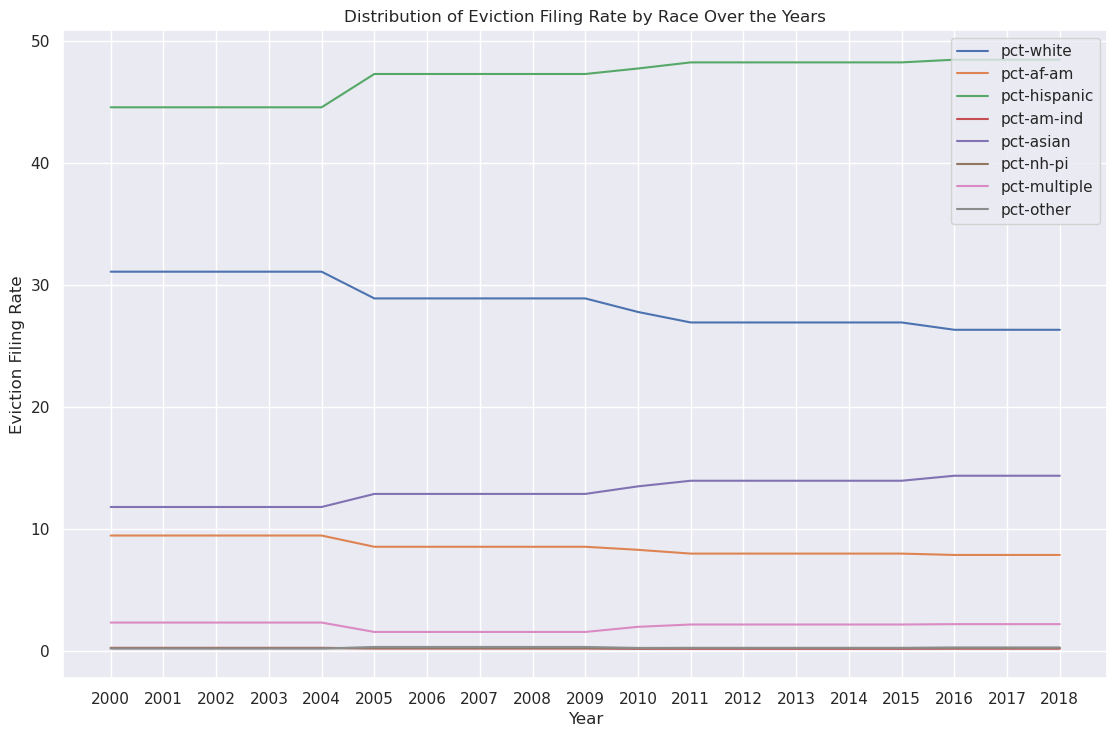

In [127]:
#Distribution of Eviction Filing Rate by Race over the Years 
# Select relevant columns
race_columns = ['pct-white', 'pct-af-am', 'pct-hispanic', 'pct-am-ind', 'pct-asian', 'pct-nh-pi', 'pct-multiple', 'pct-other']
columns_of_interest = ['year', 'eviction-filing-rate'] + race_columns
df_race = df[columns_of_interest]

# Convert 'year' column to integers
df_race['year'] = df_race['year'].astype(int)

# Group by year and find the average eviction filing rate for each race
df_race_grouped = df_race.groupby('year')[race_columns].mean()

# Plot the data
plt.figure(figsize=(12, 8))
for race in race_columns:
    plt.plot(df_race_grouped.index, df_race_grouped[race], label=race)

plt.title('Distribution of Eviction Filing Rate by Race Over the Years')
plt.xlabel('Year')
plt.ylabel('Eviction Filing Rate')
plt.legend()

# Set integer ticks on the x-axis
plt.xticks(df_race_grouped.index)

plt.show()


## Population distribution changes over the years across Races
White and Hispanic have a higher share of eviction filings for the timeline 2000-2018

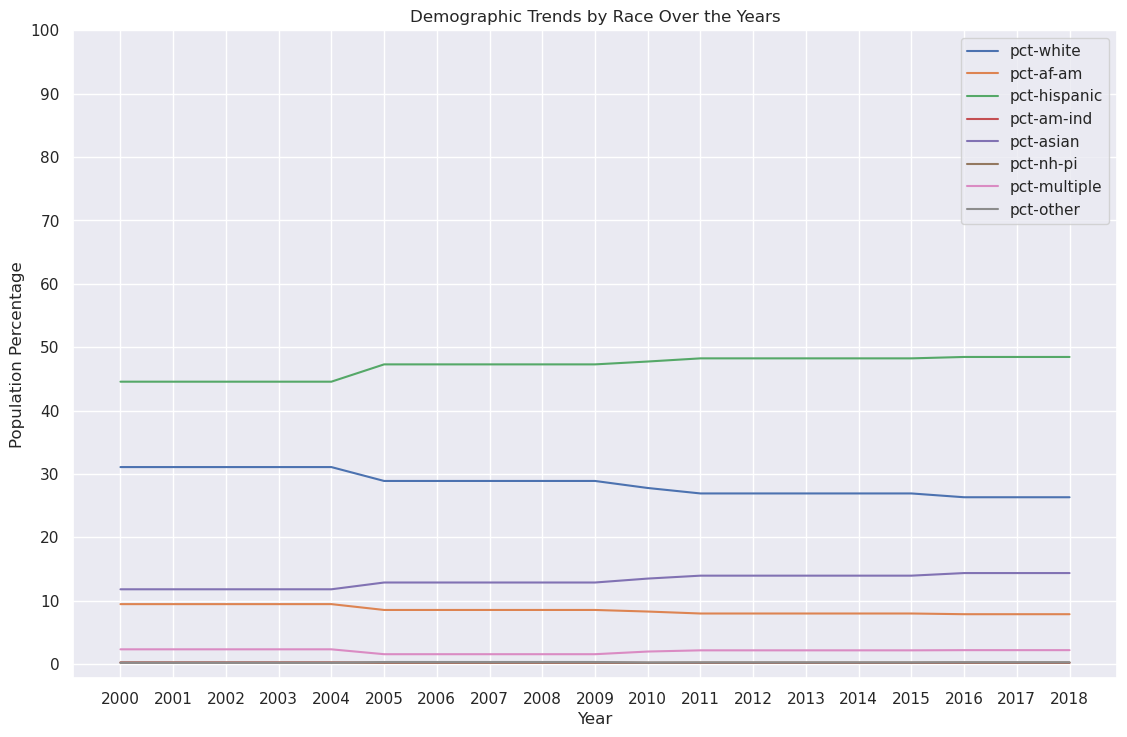

In [123]:
#Population distribution changes over the years across Races

race_columns = ['pct-white', 'pct-af-am', 'pct-hispanic', 'pct-am-ind', 'pct-asian', 'pct-nh-pi', 'pct-multiple', 'pct-other']
columns_of_interest = ['year', 'population'] + race_columns
df_race_population = df[columns_of_interest]

# Convert 'year' column to integers
df_race_population['year'] = df_race_population['year'].astype(int)

# Group by year and find the average population for each race
df_race_population_grouped = df_race_population.groupby('year')[race_columns].mean()

# Plot the data
plt.figure(figsize=(12, 8))
for race in race_columns:
    plt.plot(df_race_population_grouped.index, df_race_population_grouped[race], label=race)

plt.title('Demographic Trends by Race Over the Years')
plt.xlabel('Year')
plt.ylabel('Population Percentage')
plt.legend()

# Set integer ticks on the y-axis
plt.yticks(range(0, 101, 10))

# Set integer ticks on the x-axis for the years 2000-2018
plt.xticks(range(2000, 2019))

plt.show()
